In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [17]:
!pip install openpyxl


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# lets use university data and make group them into clusters
univ1 = pd.read_excel(r"C:\Users\priya\Downloads\civ_data.xlsx")

In [4]:
univ1.head(10)

,INSTITUTE NAME,OC BOYS,OC GIRLS,BC_A BOYS,BC_A GIRLS,BC_B BOYS,BC_B GIRLS,BC_C BOYS,BC_C GIRLS,BC_D BOYS,BC_D GIRLS,BC_E BOYS,BC_E GIRLS,SC BOYS,SC GIRLS,ST BOYS,ST GIRLS,EWS GEN OU,EWS GIRLS OU,TUITION FEE
0,A C E ENGINEERING COLLEGE (AUTONOMOUS),50394.0,50394,118578.0,118578,119406.0,119406,50394.0,50394,81641.0,109183,107192.0,114957,121412.0,121412,79365.0,120222,50394.0,78731,82000
1,ANNAMACHARYA INST OF TECHNOLOGY AND SCI,117132.0,117132,117132.0,117132,117132.0,117132,117132.0,117132,117132.0,117132,117132.0,117132,117132.0,117132,117132.0,117132,117132.0,117132,66000
2,ABDULKALAM INST OF TECHNOLOGY AND SCI,73722.0,86118,102254.0,102254,117513.0,117513,73722.0,86118,119165.0,119165,120427.0,120427,117105.0,120963,87815.0,120264,74539.0,86118,52000
3,ANURAG ENGINEERING COLLGE,114935.0,114935,114935.0,114935,115237.0,115237,114935.0,114935,114935.0,114935,114935.0,114935,118134.0,118134,118687.0,120353,114935.0,114935,73000
4,ARJUN COLLEGE OF TECHNOLOGY AND SCIENCE,35588.0,35588,35588.0,35588,35588.0,35588,35588.0,35588,35588.0,35588,35588.0,35588,35588.0,35588,35588.0,35588,35588.0,35588,57000
5,AVANTHIS SCIENTIFIC TECH AND RESEARCH ACADEMY,114458.0,114458,114458.0,114458,114458.0,114458,114458.0,114458,114458.0,114458,114458.0,114458,115272.0,115272,114458.0,114458,114458.0,114458,50000
6,AURORAS TECHNOLOGICAL AND RESEARCH INSTITUTE,95767.0,95767,95767.0,95767,95767.0,95767,95767.0,95767,95767.0,95767,95767.0,95767,95767.0,95767,95767.0,95767,95767.0,95767,72000
7,AVN INST OF ENGG TECHNOLOGY,85491.0,101581,118448.0,118448,118526.0,118968,85491.0,101581,118819.0,118819,106006.0,120809,119393.0,119393,87992.0,112233,85491.0,101581,78000
8,BHARAT INSTITUTE OF ENGG AND TECHNOLOGY,44342.0,44342,44342.0,113680,117722.0,117722,44342.0,44342,44342.0,44342,44342.0,44342,116220.0,116220,77055.0,77055,44342.0,44342,89000
9,BALAJI INSTITUTE OF TECHNOLOGY AND SCI,96240.0,96240,114560.0,114560,101301.0,110464,96240.0,96240,107562.0,107562,96240.0,96240,117768.0,117768,104746.0,121283,96240.0,96240,50000


In [24]:
univ1.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [5]:
univ1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INSTITUTE NAME  100 non-null    object 
 1   OC BOYS         96 non-null     float64
 2   OC GIRLS        100 non-null    int64  
 3   BC_A BOYS       96 non-null     float64
 4   BC_A GIRLS      100 non-null    int64  
 5   BC_B BOYS       96 non-null     float64
 6   BC_B GIRLS      100 non-null    int64  
 7   BC_C BOYS       96 non-null     float64
 8   BC_C GIRLS      100 non-null    int64  
 9   BC_D BOYS       96 non-null     float64
 10  BC_D GIRLS      100 non-null    int64  
 11  BC_E BOYS       96 non-null     float64
 12  BC_E GIRLS      100 non-null    int64  
 13  SC BOYS         96 non-null     float64
 14  SC GIRLS        100 non-null    int64  
 15  ST BOYS         96 non-null     float64
 16  ST GIRLS        100 non-null    int64  
 17  EWS GEN OU      96 non-null     floa

In [9]:
univ1.duplicated().sum()

np.int64(0)

In [10]:
def norm_fun(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [12]:
df_norm = norm_fun(univ1.iloc[:, 1:])

In [13]:
df_norm

,OC BOYS,OC GIRLS,BC_A BOYS,BC_A GIRLS,BC_B BOYS,BC_B GIRLS,BC_C BOYS,BC_C GIRLS,BC_D BOYS,BC_D GIRLS,BC_E BOYS,BC_E GIRLS,SC BOYS,SC GIRLS,ST BOYS,ST GIRLS,EWS GEN OU,EWS GIRLS OU,TUITION FEE
0,0.380088,0.380088,0.975295,0.974425,0.983652,0.983059,0.380088,0.380088,0.642751,0.891113,0.876475,0.938029,1.000000,0.999632,0.625634,0.990494,0.357646,0.609793,0.474747
1,0.964459,0.964459,0.961623,0.960273,0.962825,0.962167,0.964459,0.964459,0.963336,0.963193,0.964184,0.959650,0.960460,0.959214,0.963670,0.962807,0.963172,0.962698,0.313131
2,0.584353,0.692894,0.820955,0.814656,0.966314,0.965667,0.584353,0.692894,0.981699,0.981628,0.993259,0.992405,0.960211,0.995392,0.701267,0.990870,0.576718,0.677679,0.171717
3,0.945221,0.945221,0.940851,0.938770,0.945469,0.944757,0.945221,0.945221,0.943490,0.943271,0.944798,0.937811,0.969717,0.968676,0.977588,0.991667,0.943238,0.942507,0.383838
4,0.250444,0.250444,0.190645,0.162168,0.215982,0.212998,0.250444,0.250444,0.226761,0.223760,0.244651,0.149042,0.207132,0.189153,0.233806,0.232179,0.223309,0.213309,0.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.502097,0.717272,0.930810,0.940032,0.843495,0.954073,0.625936,0.717272,0.864281,0.863755,0.743905,0.887252,0.950621,0.969356,0.694303,0.868002,0.484072,0.703264,0.808081
96,0.304759,0.304759,0.567115,0.682937,0.365948,0.416065,0.304759,0.304759,0.282792,0.397193,0.518243,0.528073,0.504513,0.648173,0.309671,0.308123,0.696929,0.741008,0.909091
97,0.815017,0.945624,0.800259,0.939220,0.815139,0.942405,0.815017,0.945624,0.809172,0.943688,0.813587,0.938268,0.949365,0.947872,0.958022,0.957154,0.808320,0.942930,0.107071
98,0.643886,0.643886,0.615476,0.601946,0.627513,0.625811,0.643886,0.643886,0.632634,0.631208,0.684159,0.644181,0.622237,0.876347,0.635981,0.634775,0.630994,0.626243,0.240404


In [14]:
df_norm.describe()

,OC BOYS,OC GIRLS,BC_A BOYS,BC_A GIRLS,BC_B BOYS,BC_B GIRLS,BC_C BOYS,BC_C GIRLS,BC_D BOYS,BC_D GIRLS,BC_E BOYS,BC_E GIRLS,SC BOYS,SC GIRLS,ST BOYS,ST GIRLS,EWS GEN OU,EWS GIRLS OU,TUITION FEE
count,96.000000,100.000000,96.000000,100.000000,96.000000,100.000000,96.000000,100.000000,96.000000,100.000000,96.000000,100.000000,96.000000,100.000000,96.000000,100.000000,96.000000,100.000000,100.000000
mean,0.578805,0.619893,0.698443,0.753734,0.702673,0.747756,0.622460,0.668638,0.673382,0.716103,0.687868,0.712827,0.774526,0.831896,0.677273,0.800470,0.637856,0.678870,0.395808
std,0.285026,0.282322,0.263885,0.245763,0.283441,0.266682,0.265801,0.259491,0.282348,0.266987,0.254684,0.255120,0.275084,0.254581,0.293037,0.244144,0.255135,0.249030,0.257745
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.368638,0.401898,0.530952,0.663274,0.500978,0.636994,0.420540,0.504702,0.462532,0.615555,0.533418,0.610573,0.617765,0.775235,0.464672,0.733411,0.452209,0.514058,0.202020
50%,0.579659,0.678442,0.774779,0.837431,0.792742,0.855755,0.667541,0.726466,0.760164,0.789080,0.736069,0.749617,0.949993,0.961357,0.754589,0.923424,0.685438,0.729731,0.343434
75%,0.782936,0.839539,0.931051,0.938882,0.945494,0.953459,0.802165,0.894928,0.908913,0.930646,0.906377,0.932008,0.976521,0.986456,0.962032,0.972744,0.826621,0.901396,0.522727
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
print(df_norm.isnull().sum())

OC BOYS         4
OC GIRLS        0
BC_A BOYS       4
BC_A GIRLS      0
BC_B BOYS       4
BC_B GIRLS      0
BC_C BOYS       4
BC_C GIRLS      0
BC_D BOYS       4
BC_D GIRLS      0
BC_E BOYS       4
BC_E GIRLS      0
SC BOYS         4
SC GIRLS        0
ST BOYS         4
ST GIRLS        0
EWS GEN OU      4
EWS GIRLS OU    0
TUITION FEE     0
dtype: int64


In [26]:
import numpy as np

In [27]:
df_clean = df_norm.replace([np.inf, -np.inf], np.nan).dropna()


In [28]:
df_clean.isnull().sum()

OC BOYS         0
OC GIRLS        0
BC_A BOYS       0
BC_A GIRLS      0
BC_B BOYS       0
BC_B GIRLS      0
BC_C BOYS       0
BC_C GIRLS      0
BC_D BOYS       0
BC_D GIRLS      0
BC_E BOYS       0
BC_E GIRLS      0
SC BOYS         0
SC GIRLS        0
ST BOYS         0
ST GIRLS        0
EWS GEN OU      0
EWS GIRLS OU    0
TUITION FEE     0
dtype: int64

In [29]:
#for creating dendogram
from scipy.cluster.hierarchy import linkage, dendrogram

In [30]:
z = linkage(df_clean, method = "complete" , metric= "euclidean")

In [36]:
plt.figure(figsize=(150,80));plt.title("hierarchical clustering"), plt.xlabel("index"), plt.ylabel("distance")

(Text(0.5, 1.0, 'hierarchical clustering'),
 Text(0.5, 0, 'index'),
 Text(0, 0.5, 'distance'))

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [50.0, 50.0, 82.5, 82.5],
  [12.5, 12.5, 66.25, 66.25],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [155.0, 155.0, 165.0, 165.0],
  [132.5, 132.5, 160.0, 160.0],
  [115.0, 115.0, 146.25, 146.25],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [215.0, 215.0, 225.0, 225.0],
  [235.0, 235.0, 245.0, 245.0],
  [220.0, 220.0, 240.0, 240.0],
  [183.75, 183.75, 230.0, 230.0],
  [130.625, 130.625, 206.875, 206.875],
  [105.0, 105.0, 168.75, 168.75],
  [255.0, 255.0, 265.0, 265.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [260.0, 260.0, 282.5, 282.5],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [315.0, 315.0, 332.5, 332.5],
  [305.0, 305.0, 323.75, 323.75],
  [355.0, 355.0, 3

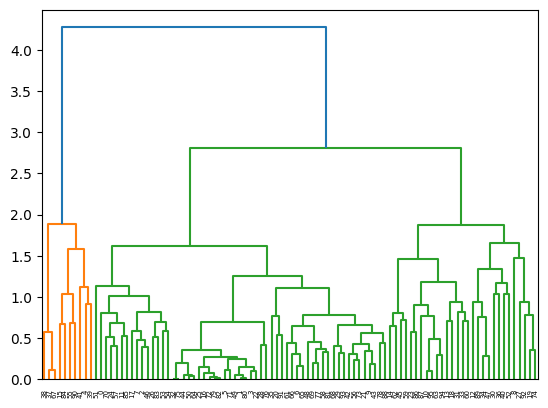

In [32]:
dendrogram(z)

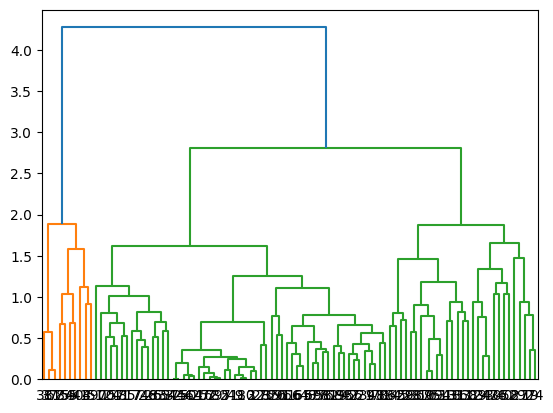

In [37]:
dendrogram(z,
           leaf_rotation=0, 
           leaf_font_size =10
          )
plt.show()

In [38]:
from sklearn.cluster import AgglomerativeClustering

In [60]:
h_complete = AgglomerativeClustering(n_clusters=6, linkage="complete").fit(df_clean)

In [61]:
h_complete.labels_

array([0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 4, 0, 5, 4, 4, 1, 0, 0, 4, 2, 0, 0,
       0, 4, 0, 0, 0, 2, 0, 0, 5, 4, 0, 4, 5, 0, 5, 3, 3, 1, 5, 1, 0, 0,
       0, 4, 0, 5, 0, 0, 0, 0, 5, 0, 0, 1, 0, 0, 0, 4, 4, 0, 4, 4, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 4,
       0, 5, 1, 0, 2, 0, 4, 4])

In [62]:
#convert these labels into series like columns
cluster_labels = pd.Series(h_complete.labels_)

In [65]:
univ1["clusters"]=cluster_labels

In [66]:
univ1

,TUITION FEE,clusters,INSTITUTE NAME,OC BOYS,OC GIRLS,BC_A BOYS,BC_A GIRLS,BC_B BOYS,BC_B GIRLS,BC_C BOYS,...,BC_D BOYS,BC_D GIRLS,BC_E BOYS,BC_E GIRLS,SC BOYS,SC GIRLS,ST BOYS,ST GIRLS,EWS GEN OU,EWS GIRLS OU
0,82000,0.0,A C E ENGINEERING COLLEGE (AUTONOMOUS),50394.0,50394,118578.0,118578,119406.0,119406,50394.0,...,81641.0,109183,107192.0,114957,121412.0,121412,79365.0,120222,50394.0,78731
1,66000,0.0,ANNAMACHARYA INST OF TECHNOLOGY AND SCI,117132.0,117132,117132.0,117132,117132.0,117132,117132.0,...,117132.0,117132,117132.0,117132,117132.0,117132,117132.0,117132,117132.0,117132
2,52000,0.0,ABDULKALAM INST OF TECHNOLOGY AND SCI,73722.0,86118,102254.0,102254,117513.0,117513,73722.0,...,119165.0,119165,120427.0,120427,117105.0,120963,87815.0,120264,74539.0,86118
3,73000,0.0,ANURAG ENGINEERING COLLGE,114935.0,114935,114935.0,114935,115237.0,115237,114935.0,...,114935.0,114935,114935.0,114935,118134.0,118134,118687.0,120353,114935.0,114935
4,57000,1.0,ARJUN COLLEGE OF TECHNOLOGY AND SCIENCE,35588.0,35588,35588.0,35588,35588.0,35588,35588.0,...,35588.0,35588,35588.0,35588,35588.0,35588,35588.0,35588,35588.0,35588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,115000,4.0,VIDYAJYOTHI INSTITUTE OF TECHNOLOGY,64328.0,88902,113873.0,115064,104103.0,116251,78471.0,...,106166.0,106166,92168.0,109849,116067.0,118206,87037.0,106551,64328.0,88902
96,125000,NaN,VARDHAMAN COLLEGE OF ENGINEERING,41791.0,41791,75406.0,88796,51962.0,57691,41791.0,...,41791.0,54714,66594.0,73717,67778.0,84195,44064.0,44064,87788.0,93009
97,45600,NaN,VIJAYA RURAL ENGINEERING COLLEGE,100065.0,114981,100065.0,114981,101007.0,114981,100065.0,...,100065.0,114981,100065.0,114981,115931.0,115931,116501.0,116501,100065.0,114981
98,58800,NaN,VIVEKANANDA INSTT OF TECH AND SCI BOMMAKAL,80521.0,80521,80521.0,80521,80521.0,80521,80521.0,...,80521.0,80521,85397.0,85397,80521.0,108357,80521.0,80521,80521.0,80521


In [67]:
univ1.shape

(100, 21)

In [68]:
univ1 = univ1.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]]

In [69]:
univ1.head()

,TUITION FEE,clusters,INSTITUTE NAME,OC BOYS,OC GIRLS,BC_A BOYS,BC_A GIRLS,BC_B BOYS,BC_B GIRLS,BC_C BOYS,...,BC_D BOYS,BC_D GIRLS,BC_E BOYS,BC_E GIRLS,SC BOYS,SC GIRLS,ST BOYS,ST GIRLS,EWS GEN OU,EWS GIRLS OU
0,82000,0.0,A C E ENGINEERING COLLEGE (AUTONOMOUS),50394.0,50394,118578.0,118578,119406.0,119406,50394.0,...,81641.0,109183,107192.0,114957,121412.0,121412,79365.0,120222,50394.0,78731
1,66000,0.0,ANNAMACHARYA INST OF TECHNOLOGY AND SCI,117132.0,117132,117132.0,117132,117132.0,117132,117132.0,...,117132.0,117132,117132.0,117132,117132.0,117132,117132.0,117132,117132.0,117132
2,52000,0.0,ABDULKALAM INST OF TECHNOLOGY AND SCI,73722.0,86118,102254.0,102254,117513.0,117513,73722.0,...,119165.0,119165,120427.0,120427,117105.0,120963,87815.0,120264,74539.0,86118
3,73000,0.0,ANURAG ENGINEERING COLLGE,114935.0,114935,114935.0,114935,115237.0,115237,114935.0,...,114935.0,114935,114935.0,114935,118134.0,118134,118687.0,120353,114935.0,114935
4,57000,1.0,ARJUN COLLEGE OF TECHNOLOGY AND SCIENCE,35588.0,35588,35588.0,35588,35588.0,35588,35588.0,...,35588.0,35588,35588.0,35588,35588.0,35588,35588.0,35588,35588.0,35588


In [71]:
univ1.to_csv("civil_university_cluster.csv", encoding = "utf-8")

In [72]:
import os

In [73]:
os.getcwd()

'C:\\Users\\priya'